<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques that are used to avoid overfitting (but haven't practiced them yet). In this project, we'll practice a fundamental method for avoiding overfitting that is commonly referred to as: _train/test split validation_. 

This is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we will be splitting the data into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California, 20 percent data from elsewhere, and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case, we've still overfit on our data set because we did not sufficiently randomize the data.

Note: In a situation like this, you could use a technique called _k-fold cross-validation_, which is cross-validation applied to more than two subsets. In particular, in k-fold cross-validation, you'd partition your data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. You would do this for each of the possible $k-1$ subsets.

# Project Requirements

The goal of this project will be to create a test-training split to compare multiple models on the same Boston housing data set. For example, you might choose to compare different linear models on the same data.

In this project, you'll fit two to three different models on the Boston housing data. For example, you could pick two different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Work with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train your model on the training data.
* Evaluate your model on the test data.
* Repeat with other variables.
* Rank the models by how well they score on the testing data set. 
* Don't forget to interpret your findings! 



A k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression

As a real estate developer, you are being asked to model the median home price of various houses in the city of Boston using data from the US census. Your goal is to predict a continuous, numeric output (price) based on a combination of discrete features that you choose.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### REQUIRED: Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it _ought_ to be pretty clean, but you should always perform exploratory data analysis.

In [3]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column

bostondata = pd.DataFrame(boston.data,columns=boston.feature_names)
bostondata['MEDV'] = boston.target

In [4]:
# Print data head.
bostondata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Get shape.
bostondata.shape

(506, 14)

In [7]:
# Find data types.
bostondata.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [62]:
# Get indices.
bostondata.index

RangeIndex(start=0, stop=506, step=1)

In [87]:
# Get summary statistics.
bostondata.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [88]:
# Based on the data dictionary, I want to make sure the only two CHAS values are 0 and 1.
bostondata.CHAS.unique()

array([0., 1.])

In [89]:
# Get total nulls.
bostondata.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [90]:
# Get unique values of each column.
uniqueValues = bostondata.nunique()
print(uniqueValues)

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64


## Using `scikit-learn` Linear Regression

### REQUIRED: Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict your target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [106]:
# Set up variables.
feature_cols = ['CRIM','DIS','PTRATIO','RM']
X = bostondata[feature_cols]
y = bostondata['MEDV']

# Load required libraries.
from sklearn.linear_model import LinearRegression

# Make the LinearRegression object.
lr = LinearRegression()
type(lr)

sklearn.linear_model._base.LinearRegression

In [114]:
# Fit the model with data.
lr.fit(X,y)

#Print the coefficients.
print(lr.intercept_)
list(zip(feature_cols,lr.coef_))

-3.433300786553282


[('CRIM', -0.20373581519128184),
 ('DIS', 0.015225050189278333),
 ('PTRATIO', -1.0680234840663636),
 ('RM', 7.376001848035338)]

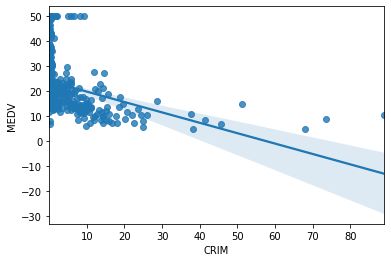

In [108]:
# Plot predictions for CRIM.
import seaborn as sns
sns.regplot(x='CRIM', y='MEDV', data=bostondata);
# As the crime rate increases, median home value decreases.

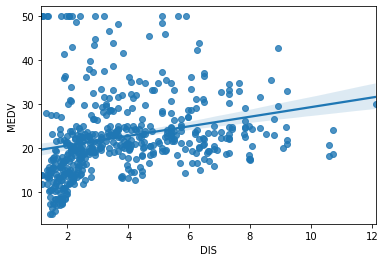

In [109]:
# Plot predictions for DIS.
sns.regplot(x='DIS', y='MEDV', data=bostondata);
# As the weighted distance to employment centers increases, median home value increases.

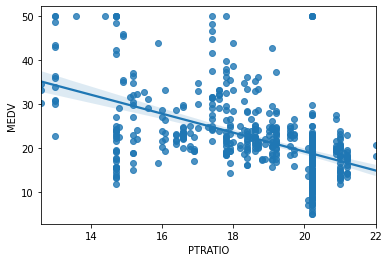

In [110]:
# Plot predictions for PTRATIO.
sns.regplot(x='PTRATIO', y='MEDV', data=bostondata);
# As the pupil-teacher ratio increases, median home value decreases.

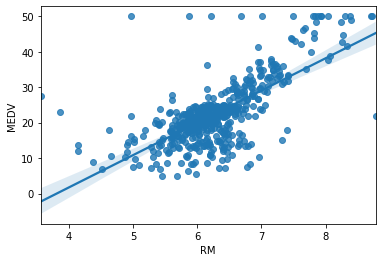

In [111]:
# Plot predictions for RM.
sns.regplot(x='RM', y='MEDV', data=bostondata);
# As the average number of rooms per home increases, median home value decreases.

In [113]:
 # Get model accuracy score.
lr.score(X,y)

0.5943513973592274

### REQUIRED: Try 70/30 and 90/10 train/test splits: 70% of the data for training - 30% for testing, then 90% for training - 10% for testing.
Score and plot both of these approaches. How do your metrics change? What does this tell us about the size of training/testing splits? Include a written response.

In [142]:
## SEVENTY-THIRTY APPROACH
# Import required library.
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,train_size=.7,random_state = 26)

In [143]:
# Examine the before and after splitting shapes.
print(X.shape)
print(X_train.shape)
print(X_test.shape)

print(y.shape)
print(y_train.shape)
print(y_test.shape)

(506, 4)
(354, 4)
(152, 4)
(506,)
(354,)
(152,)


In [144]:
# Train the model on the training set.
lr2 = LinearRegression()
lr2.fit(X_train,y_train)

LinearRegression()

In [145]:
# Test the model on the testing set and check for accuracy.
y_pred = lr2.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_train,lr2.predict(X_train))))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# The MSE is smaller for the training model, but they are approximately comparable.

5.864527716769361
5.887337709709319


In [146]:
 # Get model accuracy score.
lr2.score(X,y)

0.5916442723323012

In [147]:
# Get R-squared.
metrics.r2_score(y_test,y_pred)

0.567392441088661

In [148]:
## NINETY TEN APPROACH
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1,train_size=.9,random_state = 26)

In [149]:
# Examine the before and after splitting shapes.
print(X.shape)
print(X_train.shape)
print(X_test.shape)

print(y.shape)
print(y_train.shape)
print(y_test.shape)

(506, 4)
(455, 4)
(51, 4)
(506,)
(455,)
(51,)


In [150]:
# Train the model on the training set.
lr3 = LinearRegression()
lr3.fit(X_train,y_train)

LinearRegression()

In [151]:
# Test the model on the testing set and check for accuracy.
y_pred = lr3.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_train,lr3.predict(X_train))))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# The MSE is smaller for the training model and the magnitude of difference is greater than that of
# the 70/30 model.

5.848941503718136
5.909708905939067


In [152]:
 # Get model accuracy score.
lr3.score(X,y)

0.5939076513238006

In [153]:
# Get R-squared.
metrics.r2_score(y_test,y_pred)

0.6225427979374043

When comparing the 70/30 (model A) and 90/10 models (model B), they yield very close MSE, with Model A having *slightly* lower MSE in the test model. In terms of accuracy score, the two models scored approximately the same. Rsquared was slightly higher for model B. This tells us that a larger split (such as 90/10) produces slightly more error, but a bigger Rsquared.

## BONUS: Try the k-fold cross-validation technique described above, varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds? Include a written response.

In [154]:
# Import necessary library.
from sklearn import model_selection

# Set up model with 5 folds.
kf5 = model_selection.KFold(n_splits=5,shuffle=True)

In [155]:
# Run the cross validation.
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf5.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 51.31951143571856
R2: 0.5937399372194638

Model 2
MSE: 46.65330574596662
R2: 0.593219235169492

Model 3
MSE: 24.16638470701343
R2: 0.5929234718546843

Model 4
MSE: 22.718785858895043
R2: 0.5940212411858607

Model 5
MSE: 30.791373207294516
R2: 0.5917704340590554

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 35.129872190977636
Mean of R2 for all folds: 0.5931348638977112


In [161]:
# Score the cross-validation with five folds.
from sklearn.model_selection import cross_val_score
kf5 = model_selection.KFold(n_splits=5, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf5, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf5)))

35.35127041979952
0.5795577699894301


In [162]:
# Set up model with 10 folds.
kf10 = model_selection.KFold(n_splits=10,shuffle=True)

In [163]:
# Run the cross validation.
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf10.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 46.211140460892295
R2: 0.5938005849316922

Model 2
MSE: 49.288044318920896
R2: 0.5936149423621054

Model 3
MSE: 26.99484671562909
R2: 0.5943165999239521

Model 4
MSE: 59.206494049894665
R2: 0.5931787369030809

Model 5
MSE: 27.34898839107684
R2: 0.5940729463060429

Model 6
MSE: 54.23788406489777
R2: 0.592552345026189

Model 7
MSE: 17.255813478733426
R2: 0.5943305691584879

Model 8
MSE: 20.180719439397684
R2: 0.5942580179894753

Model 9
MSE: 21.228916114369632
R2: 0.593146534091098

Model 10
MSE: 29.306659415271174
R2: 0.5939240949502373

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 35.12595064490834
Mean of R2 for all folds: 0.5937195371642361


In [164]:
# Score the cross-validation with five folds.
kf = model_selection.KFold(n_splits=10, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf10, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf10)))

35.34700408376706
0.5477066625413075


35.35127041979952
0.5795577699894301

35.34700408376706
0.5477066625413075

The cross-validation effort found approximately the same amount of error for both models, with slightly higher variance accounted for by the model with fewer folds (k=10). Given the need to avoid overtraining the model, the five-fold model might be more appropriate as it has fewer rows in both validation and training.

## BONUS
Practice the same workflow you just worked through above, but this time use Statsmodels instead of Sklearn for linear regression. See example formulas below.

### Example: Statsmodels Formulas

Adjust the formula using your chosen metrics from the housing data. Remember, your workflow here is the same, but the syntax is a little different. Describe your results. Are they comparable to scikit-learn's regression models?

In [8]:
# First, format your data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# Set up your new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Wed, 29 Nov 2017   Prob (F-statistic):          1.59e-321
Time:                        22:28:38   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### BONUS:

Can you optimize your R2, selecting the best features? Provide your code and explain your process in a brief written response.

### BONUS:

Given a combination of predictors, can you identify another response variable that could be accurately predicted through the exploration of different predictors in this data set?

_Tip: Consider pairplots, coefficients, or Pearson scores._

In [10]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## BONUS/DEMO: Up for an additional challenge? Try again, this time using the `patsy` library.

In [11]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [12]:
from sklearn.model_selection import train_test_split  #Note: if you didn't import this earlier, you'll need to do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [13]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.5043486813354807
